# 06: Correlations

In [1]:
import SMEFT19
from wilson import Wilson
import pandas as pd

## Correlations between Wilson coefficients

In [7]:
mldata = pd.read_csv('../data/samples/mlpoints.dat', sep='\t', names=['C', 'al', 'bl', 'aq', 'bq', 'logL'], header=0)
points = mldata[['C', 'al', 'bl', 'aq', 'bq']]
points.describe()

,C,al,bl,aq,bq
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.138740,0.001323,-0.000550,-0.036397,1.257003
std,0.034286,0.030206,0.013308,0.033922,0.692111
min,-0.360432,-0.230803,-0.086155,-0.340228,-1.431780
25%,-0.152294,-0.022234,-0.007149,-0.060515,0.733512
50%,-0.134108,0.001660,-0.000105,-0.038723,1.149694
75%,-0.115983,0.026381,0.007205,-0.011527,1.662462
max,-0.048379,0.071164,0.063690,0.078168,5.452895


In [3]:
from multiprocessing import Pool

In [8]:
def WETcoeffs(i):
    w = SMEFT19.scenarios.rotBII(points.values[i])
    w2 = w.match_run(eft='WET', basis='flavio', scale=4.8)
    d = {}
    d.update({'C9e':w2.values['C9_bsee']['Re']})
    d.update({'C10e':w2.values['C10_bsee']['Re']})
    d.update({'CVLe':w2.values['CVL_bcenue']['Re']})
    d.update({'Cnue':w2.values['CL_bsnuenue']['Re']})
    d.update({'C9mu':w2.values['C9_bsmumu']['Re']})
    d.update({'C10mu':w2.values['C10_bsmumu']['Re']})
    d.update({'CVLmu':w2.values['CVL_bcmunumu']['Re']})
    d.update({'Cnumu':w2.values['CL_bsnumunumu']['Re']})
    d.update({'CVLtau':w2.values['CVL_bctaunutau']['Re']})
    d.update({'Cnutau':w2.values['CL_bsnutaunutau']['Re']})
    d.update({'logL':mldata.logL[i]})
    return d

In [9]:
with Pool(4) as pool:
    coeffs = pool.map(WETcoeffs, range(len(points)))

In [10]:
dfcoeff = pd.DataFrame(coeffs)
dfcoeff.describe()

,C9e,C10e,CVLe,Cnue,C9mu,C10mu,CVLmu,Cnumu,CVLtau,Cnutau,logL
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.564200,-0.059981,0.000077,-0.001991,-0.611000,-0.013181,1.471635e-05,-0.000202,0.089250,-2.589908,20.750311
std,0.169441,0.104682,0.000136,0.004000,0.140439,0.033100,4.320428e-05,0.001265,0.019102,0.570422,1.528156
min,-1.196949,-2.889280,-0.000280,-0.110200,-1.214391,-0.498449,-5.440271e-05,-0.018756,-0.077395,-5.078847,11.819923
25%,-0.652639,-0.092015,0.000016,-0.003208,-0.698553,-0.011183,8.253054e-07,-0.000118,0.077575,-2.938452,20.097228
50%,-0.561860,-0.041514,0.000052,-0.001271,-0.604215,-0.005337,4.538161e-06,0.000085,0.088522,-2.553703,21.170980
75%,-0.475980,-0.014635,0.000119,-0.000261,-0.528387,-0.002624,1.207274e-05,0.000192,0.100863,-2.242289,21.836101
max,2.363868,0.329542,0.003744,0.012324,0.605930,0.069168,6.460901e-04,0.002358,0.172186,2.528522,23.102316


In [11]:
dfcoeff.to_csv('../data/samples/WETcoeffs.dat', sep='\t', index=False)

In [12]:
dfcoeff_corr = dfcoeff.corr()
dfcoeff_corr

,C9e,C10e,CVLe,Cnue,C9mu,C10mu,CVLmu,Cnumu,CVLtau,Cnutau,logL
C9e,1.000000,-0.586392,0.600512,-0.599705,0.764379,0.021389,-0.001473,-0.020048,-0.784804,0.790979,-0.248813
C10e,-0.586392,1.000000,-0.999027,0.999863,0.037936,-0.000138,-0.002859,-0.001896,-0.026309,0.031784,0.098159
CVLe,0.600512,-0.999027,1.000000,-0.999186,-0.020894,0.003190,0.001230,0.003997,0.012159,-0.013628,-0.104909
Cnue,-0.599705,0.999863,-0.999186,1.000000,0.021866,-0.000540,-0.002825,-0.001430,-0.009963,0.015253,0.102024
C9mu,0.764379,0.037936,-0.020894,0.021866,1.000000,-0.209983,0.231563,-0.260963,-0.964271,0.972342,-0.314959
C10mu,0.021389,-0.000138,0.003190,-0.000540,-0.209983,1.000000,-0.999087,0.998624,-0.009396,0.024076,0.373078
CVLmu,-0.001473,-0.002859,0.001230,-0.002825,0.231563,-0.999087,1.000000,-0.998879,-0.010243,-0.001764,-0.380634
Cnumu,-0.020048,-0.001896,0.003997,-0.001430,-0.260963,0.998624,-0.998879,1.000000,0.042446,-0.028381,0.385260
CVLtau,-0.784804,-0.026309,0.012159,-0.009963,-0.964271,-0.009396,-0.010243,0.042446,1.000000,-0.988264,0.246799
Cnutau,0.790979,0.031784,-0.013628,0.015253,0.972342,0.024076,-0.001764,-0.028381,-0.988264,1.000000,-0.233825


In [13]:
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex':True})
import matplotlib
import numpy as np
from matplotlib.colors import ListedColormap

In [14]:
seismic = plt.cm.get_cmap('seismic', 512)
halfseismic = ListedColormap(seismic(np.linspace(0.5, 1, 256)))

In [15]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize=16)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    return im, cbar

In [18]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, colorcorr=False, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if colorcorr:
                kw.update(color=textcolors[int(abs(data[i, j]) > threshold)])
            else:
                kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [16]:
coeff_labels = [r'$C_9^e$', r'$C_{10}^e$', r'$C_{VL}^e$', r'$C_\nu^e$', r'$C_9^\mu$', r'$C_{10}^\mu$',
                r'$C_{VL}^\mu$', r'$C_\nu^\mu$', r'$C_{VL}^\tau$', r'$C_\nu^\tau$', r'$\Delta \chi^2_\mathrm{SM}$' ]

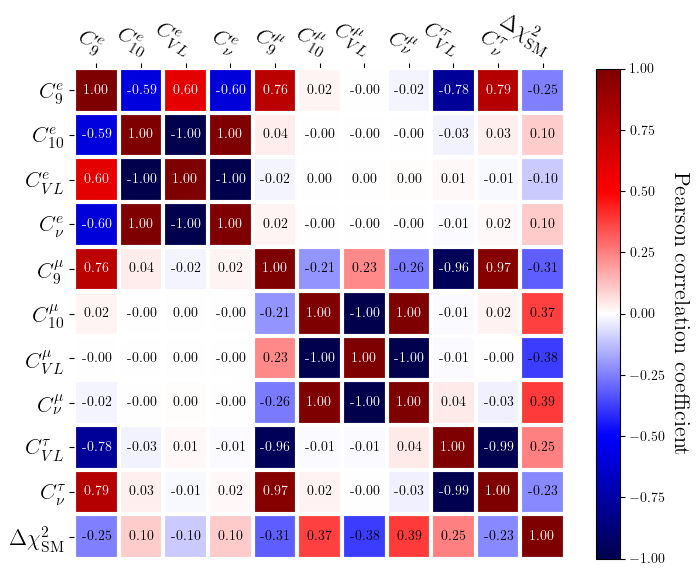

In [19]:
fig = plt.figure(figsize=(7,7))
im, cbar = heatmap(dfcoeff_corr, coeff_labels, coeff_labels, cbarlabel='Pearson correlation coefficient',
                   cmap=seismic, vmin=-1, vmax=1, cbar_kw={'shrink':0.72})
_ = annotate_heatmap(im, colorcorr=True)
plt.tight_layout(pad=0.5)
fig.savefig('../data/plots/coeffcorr.pdf')

## Correlations between observables

In [20]:
def observables(i):
    d = {}
    d.update({'BR(B->Knunu)':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'BR(B+->Knunu)', SMEFT19.scenarios.rotBII )})
    d.update({'BR(tau->mununu)':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'BR(tau->mununu)', SMEFT19.scenarios.rotBII )})
    d.update({'BR(K->pinunu)':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'BR(K+->pinunu)', SMEFT19.scenarios.rotBII )})
    d.update({'BR(B->mumu)':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'BR(B0->mumu)', SMEFT19.scenarios.rotBII )})
    d.update({'BR(Bs->mumu)':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'BR(Bs->mumu)', SMEFT19.scenarios.rotBII )})
    d.update({'RK*':SMEFT19.SMEFTglob.prediction(list(points.values[i]),  ('<Rmue>(B0->K*ll)', 1.1, 6.0), SMEFT19.scenarios.rotBII )})
    d.update({'RD*':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'Rtaul(B->Dlnu)', SMEFT19.scenarios.rotBII )})
    d.update({'logL':mldata.logL[i]})
    return d

In [21]:
with Pool(4) as pool:
    obs = pool.map(observables, range(len(points)))

In [22]:
dfobs = pd.DataFrame(obs)
dfobs.describe()

,BR(B->Knunu),BR(tau->mununu),BR(K->pinunu),BR(B->mumu),BR(Bs->mumu),RK*,RD*,logL
count,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,5.830123e-06,0.172811,1.088952e-10,1.143567e-10,3.691102e-09,0.975028,0.351712,20.750311
std,3.578395e-07,0.000055,1.445086e-10,5.323845e-13,5.992050e-11,0.036072,0.012188,1.528156
min,3.463167e-06,0.172456,6.937113e-11,1.092553e-10,3.547638e-09,0.327653,0.252926,11.819923
25%,5.599013e-06,0.172783,7.436608e-11,1.142693e-10,3.672352e-09,0.958198,0.344169,20.097228
50%,5.795500e-06,0.172826,9.015483e-11,1.142933e-10,3.677108e-09,0.980575,0.351148,21.170980
75%,6.047257e-06,0.172850,1.199985e-10,1.143491e-10,3.687363e-09,0.993230,0.359093,21.836101
max,7.637862e-06,0.172888,4.068329e-09,1.287517e-10,4.592510e-09,1.204395,0.406826,23.102316


In [23]:
dfobs.to_csv('../data/samples/observables.dat', sep='\t', index=False)

In [24]:
dfobs_corr = dfobs.corr()
dfobs_corr

,BR(B->Knunu),BR(tau->mununu),BR(K->pinunu),BR(B->mumu),BR(Bs->mumu),RK*,RD*,logL
BR(B->Knunu),1.000000,-0.161809,-0.214457,-0.179862,0.019291,-0.043098,0.986717,0.191274
BR(tau->mununu),-0.161809,1.000000,-0.094126,-0.098762,0.059335,0.030873,-0.294673,-0.143912
BR(K->pinunu),-0.214457,-0.094126,1.000000,0.750621,-0.079959,0.157961,-0.243441,-0.263962
BR(B->mumu),-0.179862,-0.098762,0.750621,1.000000,0.123525,0.215561,-0.182193,-0.213110
BR(Bs->mumu),0.019291,0.059335,-0.079959,0.123525,1.000000,0.445653,0.005900,-0.367887
RK*,-0.043098,0.030873,0.157961,0.215561,0.445653,1.000000,-0.049680,-0.100307
RD*,0.986717,-0.294673,-0.243441,-0.182193,0.005900,-0.049680,1.000000,0.237519
logL,0.191274,-0.143912,-0.263962,-0.213110,-0.367887,-0.100307,0.237519,1.000000


In [25]:
obs_labels = [r'BR($B^+\to K^+ \nu\bar{\nu}$)', r'BR($\tau^-\to \mu^- \nu\bar{\nu}$)',
              r'BR($K^+\to \pi^+ \nu\bar{\nu}$)', r'BR($B^0\to \mu^+ \mu^-$)', r'BR($B_s\to \mu^+ \mu^-$)',
              r'$R_{K^*}^{[1.1,6]}$', r'$R_D^\ell$', r'$\Delta\chi^2_\mathrm{SM}$']

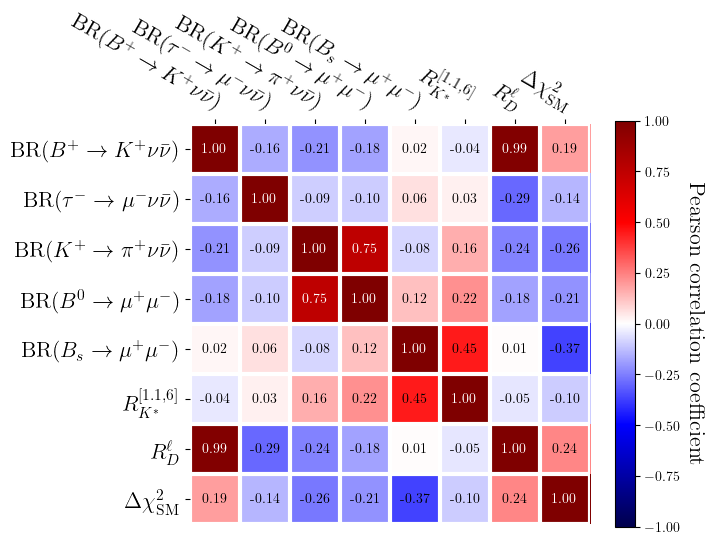

In [26]:
fig = plt.figure(figsize=(7,7))
im, cbar = heatmap(dfobs_corr, obs_labels, obs_labels, cbarlabel='Pearson correlation coefficient',
                   cmap=seismic, vmin=-1, vmax=1, cbar_kw={'shrink':0.65})
_ = annotate_heatmap(im, colorcorr=True)
plt.tight_layout(pad=0.5)
fig.savefig('../data/plots/obscorr.pdf')

## Correlation between $R_D$ and $\mathrm{BR}(B\to K \nu\nu)$

In [18]:
import SMEFT19
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import flavio

In [2]:
Knunu_SM = flavio.sm_prediction('BR(B+->Knunu)')
Knunu_SMunc = flavio.sm_uncertainty('BR(B+->Knunu)')

In [3]:
m_RD = flavio.combine_measurements('Rtaul(B->Dlnu)')
RD_central = m_RD.get_central()
RD_eleft = m_RD.get_error_left()
RD_eright = m_RD.get_error_right()

3 of the measurements of 'Rtaul(B->Dlnu)' are multivariate. This can lead to inconsistent results as the other observables are profiled over. To be consistent, you should perform a multivariate combination that is not yet supported by `combine_measurements`.


In [7]:
d_bf = SMEFT19.ellipse.load('../data/ellipses/rotBII.yaml')
RD_bf = flavio.np_prediction('Rtaul(B->Dlnu)', SMEFT19.scenarios.rotBII(d_bf['bf']))
BKnunu_bf = flavio.np_prediction('BR(B+->Knunu)', SMEFT19.scenarios.rotBII(d_bf['bf']))

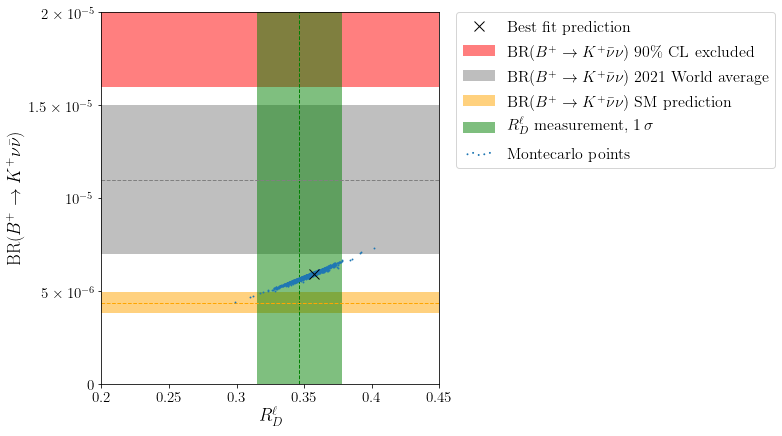

In [20]:
fig = plt.figure(figsize=(11,6))
plt.scatter(dfobs['RD*'], dfobs['BR(B->Knunu)'], s=0.8, label='Montecarlo points', zorder=4)
plt.xlim([0.2, 0.45])
plt.ylim([0, 2e-5])
ax = plt.gca()
ax.set_yticks([0, 0.5e-5, 1e-5, 1.5e-5, 2e-5])
_ = ax.set_yticklabels([r'$0$', r'$5\times10^{-6}$', r'$10^{-5}$', r'$1.5\times10^{-5}$', r'$2\times10^{-5}$'], fontsize=15)
plt.xlabel(r'$R_D^\ell$', fontsize=18)
plt.ylabel(r'BR($B^+\to K^+\nu\bar{\nu}$)', fontsize=18)
ax.add_patch(Rectangle( (0.2, 1.6e-5), 0.25, 4e-6, color='red', alpha=0.5, label=r'BR($B^+\to K^+\bar{\nu}\nu$) 90\% CL excluded', lw=0))
ax.add_patch(Rectangle( (0.2, 0.7e-5), 0.25, 2*0.4e-5, color='gray', alpha=0.5, label=r'BR($B^+\to K^+\bar{\nu}\nu$) 2021 World average', lw=0))
ax.add_patch(Rectangle( (0.2, Knunu_SM-Knunu_SMunc), 0.25, 2*Knunu_SMunc, color='orange', alpha=0.5, label=r'BR($B^+\to K^+\bar{\nu}\nu$) SM prediction', lw=0))
ax.add_patch(Rectangle( (RD_central-RD_eleft, 0), RD_eleft+RD_eright, 3e-5, color='green', alpha=0.5, label=r'$R_D^\ell$ measurement, $1\,\sigma$', lw=0))
plt.axvline(RD_central, lw=1, ls='dashed', color='green')
plt.axhline(Knunu_SM, lw=1, ls='dashed', color='orange')
plt.axhline(1.1e-5, lw=1, ls='dashed', color='gray')
plt.plot(RD_bf, BKnunu_bf, marker='x', color='black', markersize=10, zorder=5, label ='Best fit prediction', lw=0)
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., scatterpoints=5)
ax.set_xticklabels(['$0.2$',r'$0.25$',r'$0.3$',r'$0.35$',r'$0.4$',r'$0.45$'], fontsize=15)
plt.tight_layout(pad=0.5)
fig.savefig('../data/plots/RD_BKnunu.pdf')